In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
 

# Tenemos la siguiente pregunta, un grupo de sociologos reunieron datos para ver 
# si las clases sen linea son malas o buenas, tomando como métrica un examen
# Puedo ver el promedio de los examenes y usarlo como métrica definitoria
data = pd.read_csv("online_classroom.csv")
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]


In [2]:
# Promedio y longitud presencial
(face_to_face.mean(), len(face_to_face))

(78.54748458333333, 120)

In [3]:
# Promedio y tamaño online
(online.mean(), len(online))

(73.63526308510637, 94)

Diferencia entre los promedios, ¿esto es confiable?

In [4]:
face_to_face.mean() - online.mean()

4.912221498226955

La verdad es que no tengo muchos datos, recolectar más muchas veces es complicado y costoso. Necesito una conclusión.

**La diferencia promedio entre online y presencial es significativa, si o no ***

¿Cómo le puedo hacer?

### Teorema central del límite

Los promedios siguen una distribución normal

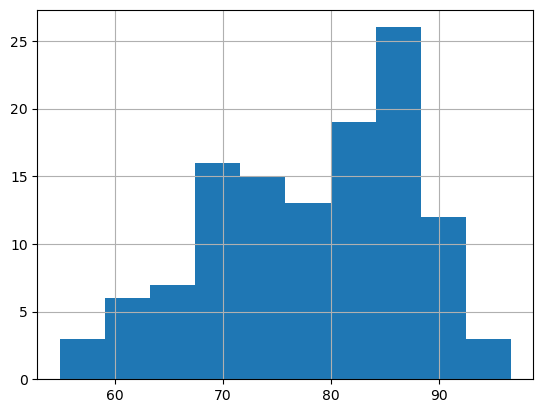

In [5]:
## Ejemplo, face to face no es normal
face_to_face.hist();

Pero si lo resampleo y tomo sus promedios si sería normal

In [6]:
promedios = []
for i in range(1000):
    promedios.append(face_to_face.sample(len(face_to_face), replace=True).mean())

promedios;

Los promedios mágicamente siguen una distribución normal

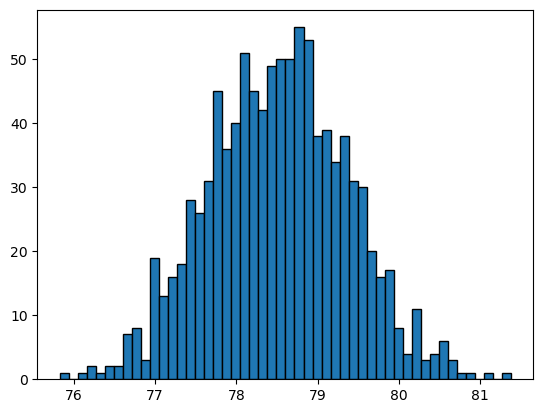

In [7]:
plt.hist(promedios, bins=50, edgecolor='black');

### Error estandard

El error estandard sería la desviación estandard de los promedios posibles


Si $X$ son $n$ observaciones independientes con una media $\mu$ y una varianza $\sigma^2$

$T = (X_1 + X_2 + X_3 + ... + X_n)$

$Var(T) = n\sigma^2$

$Var(\frac{T}{n}) = Var(\frac{1}{n} * T) = \frac{1}{n^2} * Var(T) = \frac{1}{n^2} * n\sigma^2  = \frac{\sigma^2}{n}$

Ojo: la varianza de $\frac{T}{n}$ es la varianza de los promedios


La desviación estandard de lo anterior sería:

$Sd(\frac{T}{n}) = \frac{\sigma}{\sqrt{n}}$

In [8]:
### Error estandard de face to face
face_to_face.std() / np.sqrt(len(face_to_face))

0.8723511456319104

In [9]:
# La desvición estandard de nuestra simulación debe ser muy similar
np.std(promedios)

0.8531591210977545

In [19]:
# Si usamos pandas
face_to_face.sem()

0.8723511456319106

### Explicar que es el error estandard

Tenemos una muestra de datos la cual pertenece a una muestra mayor la cual no conocemos.

Los promeddios posibles de esa muestra hipotetica de datos siguen una _distribución normal_ por el teorema central del límite  

Matemáticamente sabemos que la desviación estandard de ese promedio desconocido es el error estandard



#### Aplicando el error estandard

Si los promedios de mis datos siguen una distribución normal, puedo sacar algunas conclusiones interesantes. 

Sabemos que dentro de una distribución normal
- 1 desviación estandard estan 68% de los datos
- 2 desviaciones estandard están 95% de los datos
- 3 desviaciones estandard estan 99% de los datos





In [11]:
# Error estandard de las variables en cuestión


### Intervalo de confianza

Dame el intervalo de confianza al 95% del promedio de clases en linea y presencial


In [20]:
(online.mean() - 2*online.sem(), online.mean() + 2*online.sem())

(70.56094429049804, 76.7095818797147)

In [21]:
(face_to_face.mean() - 2*face_to_face.sem(), face_to_face.mean() + 2*face_to_face.sem())

(76.80278229206951, 80.29218687459715)

### Prueba de hipotesis

Al sumar dos variables normaes:

$N(\mu_1, \sigma^2_1) + N(\mu_2, \sigma^2_2)  = N(\mu_1 + \mu_2, \sigma^2_1 + \sigma^2_2)$ 

Y al restar
$N(\mu_1, \sigma^2_1) - N(\mu_2, \sigma^2_2)  = N(\mu_1 - \mu_2, \sigma^2_1 + \sigma^2_2)$ 

Si no me creen:

histtype='step'

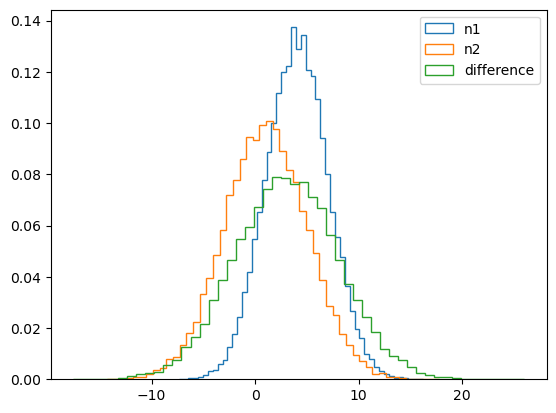

In [24]:
np.random.seed(123)
df_normals = pd.DataFrame({
    'n1': np.random.normal(4, 3, 30000),
    'n2': np.random.normal(1, 4, 30000)
})

df_normals['difference'] = df_normals['n1'] - df_normals['n2']

plt.hist(df_normals.n1, histtype='step', density=True, bins=50, label='n1')
plt.hist(df_normals.n2, histtype='step', density=True, bins=50, label='n2')
plt.hist(df_normals.difference, histtype='step', density=True, bins=50, label='difference')
plt.legend();

En este caso, sabemos que *los promedios* tienen una distribución normal 

En este momento yo tengo dos promedios con sus respectivas desviaciones estandard, quiere decir que puedo combinar la distribución de las clases online y presencial. 

Al hacer esta combinación podría sacar estadísticas interesantes.

¿Las diferencias entre online y presencial como se ven? ¿Cuál es su distribución ¿Eso me puede ayudar a determinar que es mejor?


$\mu_{diff} = \mu_1 - \mu_2 $

$SE_{diff} = \sqrt{SE^2_1 + SE^2_2}$

In [26]:
### Mu diff
mu_diff = online.mean() - face_to_face.mean()
## SE diff
se_diff = np.sqrt(online.sem()**2 + face_to_face.sem()**2)
# CI
print(f'Intervalo de confianza del efecto causal de tener clases en linea entre {mu_diff - 2*se_diff} y {mu_diff + 2*se_diff}')

Intervalo de confianza del efecto causal de tener clases en linea entre -8.44710793714168 y -1.3773350593122307


stats.norm.pdf
plt.vlines

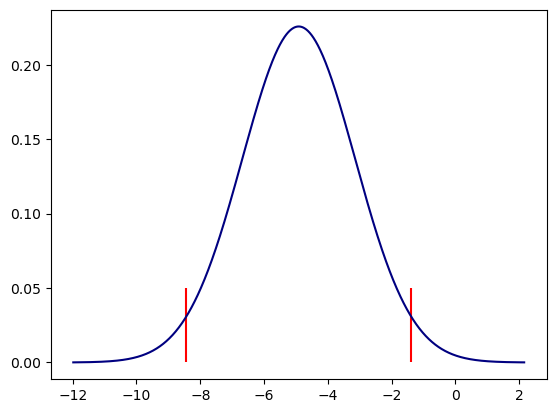

In [34]:
## Visualizando 
x = np.linspace(mu_diff - 4*se_diff, mu_diff + 4*se_diff, 1000)
y = stats.norm.pdf(x, mu_diff, se_diff)

plt.vlines(mu_diff - 2*se_diff, ymin=0, ymax=0.05, colors = 'red')
plt.vlines(mu_diff + 2*se_diff, ymin=0, ymax=0.05, colors = 'red')


plt.plot(x, y, c = 'navy');

Con esto en mano, podemos decir que hay un 95% de confianza de que la verdadera diferencia en medias de online y clases presenciales este entre -8.37 y -1.44



#### Repasando: estadístico Z
Si X es una variable aleatoria normalmente distribuida y $X ~ N(μ, σ)$, entonces la puntuación z para una determinada $x$ es:

$z = \frac{x - \mu}{\sigma}$


Como han visto en sus otras clases, hacer algo "normal estandard" es simplemente escalar sus datos a que tengan media 0 y varianza 1




#### Adaptnado esto al problema

Podría transformar las diferencias entre online y presencial a una distribución nor,al estandard, _asumiendo que la diferencia real es 0_ (lingo estadístico: la hipotesis nula $H_0$=0).

Al hacer esto, puedo ver que tan extremo se ve esta diferencia en la distribución normal estandard, si da muy extremo entonces seria raro y podemos calcular la probabilidad de que sea azar.

- $x$ serían las diferencias 
- $\mu$ sería 0, ya que quiero ve tan probable es esto
- $\sigma$ sería el error estandard de las diferencias 

De esto:

$z = \frac{x - \mu}{\sigma}$

Pasamos a esto:


$z = \frac{\mu_{diff} - H_0}{SE_{diff}}$

Dado que mi hipotesis es que los promedios _no varían_, $H_0 = 0$ 

$z = \frac{\mu_{diff}}{SE_{diff}}$




In [36]:
# Calcula el estadístico Z
z = mu_diff / se_diff
z

-2.779281079103123

En una distribución normal estandard, este resultado Z es bastante extremo no parece ser resultado de azar

stats.norm.cdf

In [37]:
# Obten el p value
stats.norm.cdf(z)

0.002723968083556333

In [17]:
## Probabilidad de que las diferencias entre desempeños sean producto del azar


In [39]:
## Crea un código base para el AB test
def AB_test(test, control):
    # Mu
    mu_test = test.mean()
    mu_control = control.mean()
    # SE
    se_test = test.sem()
    se_control = control.sem()
    # Differences
    mu_diff = mu_test - mu_control
    se_diff = np.sqrt(se_test**2 + se_control**2)
    # Z score and p value 
    z = mu_diff / se_diff
    p_value = stats.norm.cdf(z)

    print(f'Variable test entre: {mu_test - 2*se_test} y {mu_test + 2*se_test}')
    print(f'Variable control entre: {mu_control - 2*se_control} y {mu_control + 2*se_control}')
    print(f'Intervalo de confianza del efecto causal de ser test entre {mu_diff - 2*se_diff} y {mu_diff + 2*se_diff}')
    print(f'Z score: {z}')
    print(f'P value: {p_value}')
    return

    
AB_test(online, face_to_face)

Variable test entre: 70.56094429049804 y 76.7095818797147
Variable control entre: 76.80278229206951 y 80.29218687459715
Intervalo de confianza del efecto causal de ser test entre -8.44710793714168 y -1.3773350593122307
Z score: -2.779281079103123
P value: 0.002723968083556333
